In [ ]:
#pip install pdpbox

In [ ]:
#pip install shap

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bank-direct-marketing-campaigns.csv to bank-direct-marketing-campaigns (1).csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['bank-direct-marketing-campaigns.csv'].decode('utf-8')))

# **EDA**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


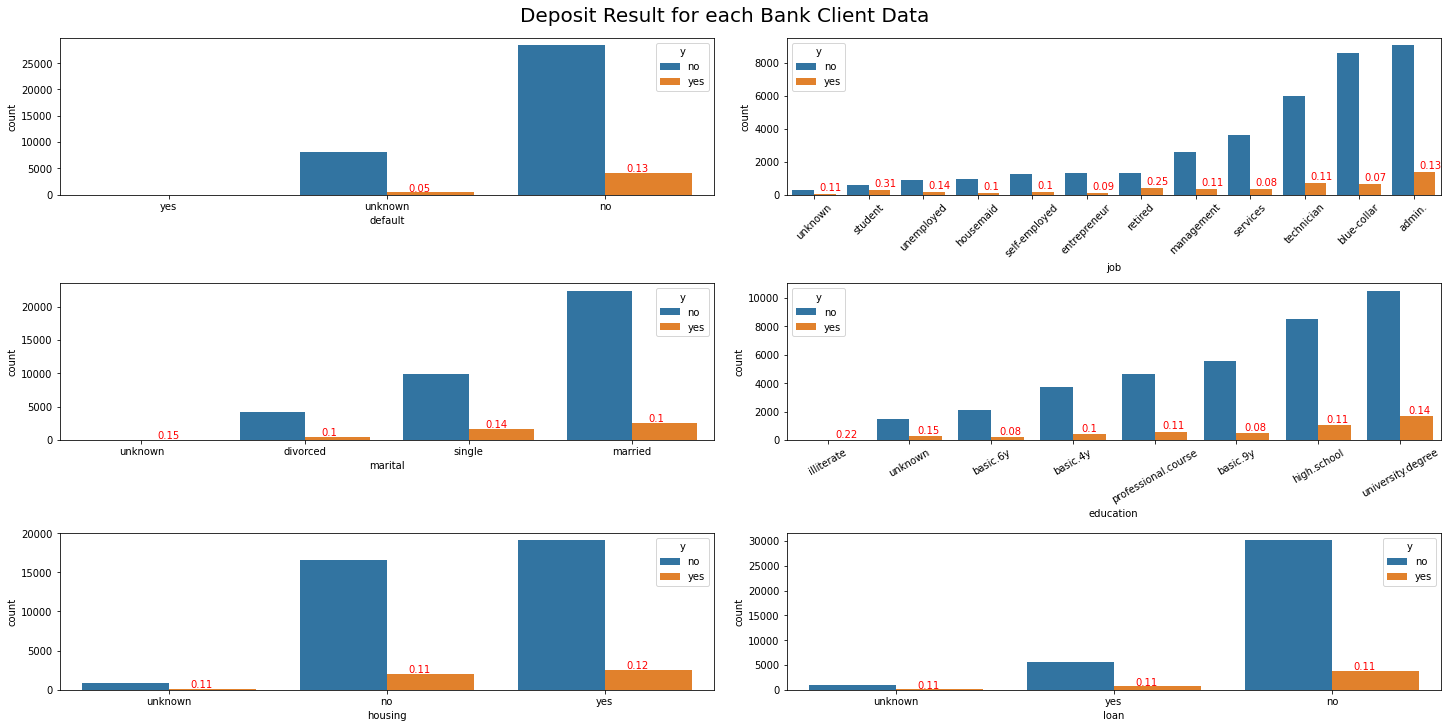

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(20,10), constrained_layout = True)
plt.suptitle('Deposit Result for each Bank Client Data',fontsize=20)

sns.countplot(data = df, x="default", hue="y", ax=ax[0][0], order = df.default.value_counts(ascending=True).index)
sns.countplot(data = df, x="job", hue="y", ax=ax[0][1], order = df.job.value_counts(ascending=True).index)
sns.countplot(data = df, x="marital", hue="y", ax=ax[1][0], order = df.marital.value_counts(ascending=True).index)
sns.countplot(data = df, x="education", hue="y", ax=ax[1][1], order = df.education.value_counts(ascending=True).index)
sns.countplot(data = df, x="housing", hue="y", ax=ax[2][0], order = df.housing.value_counts(ascending=True).index)
sns.countplot(data = df, x="loan", hue="y", ax=ax[2][1], order = df.loan.value_counts(ascending=True).index)

for i, j in [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]:
  for idx, p in enumerate(ax[i][j].patches):
    half = int(len(ax[i][j].patches)/2)
    if(idx >= half):
      continue
    total = ax[i][j].patches[idx+half].get_height() + p.get_height()
    txt = str(((ax[i][j].patches[idx+half].get_height() / total) if total !=0 else 0).round(2))
    txt_x = ax[i][j].patches[idx+half].get_x() + ax[i][j].patches[idx+half].get_width()/4
    txt_y = ax[i][j].patches[idx+half].get_height()+200
    ax[i][j].text(txt_x,txt_y,txt, color="r")

ax[0][1].tick_params(axis= "x", labelrotation=45)
ax[1][1].tick_params(axis = "x", labelrotation=30)

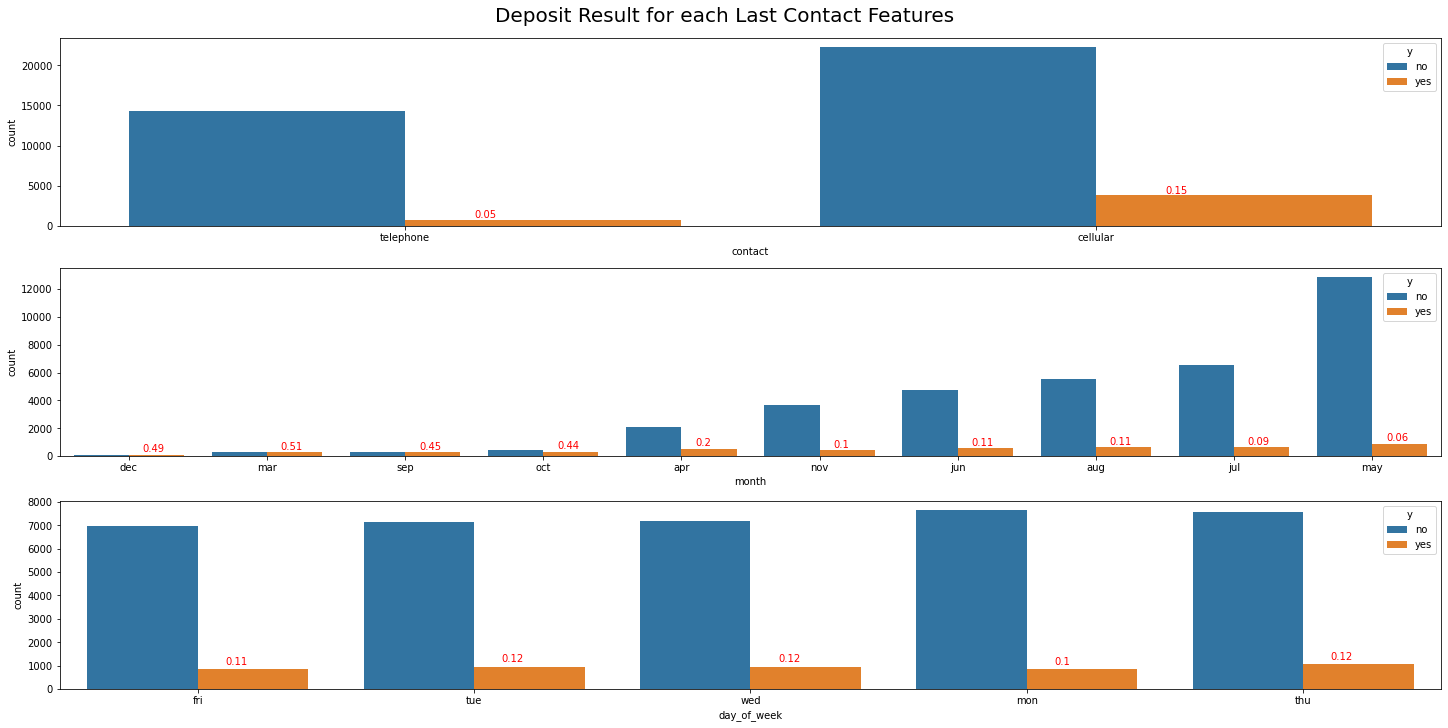

In [ ]:
fig, ax = plt.subplots(3, figsize=(20,10), constrained_layout = True)
plt.suptitle('Deposit Result for each Last Contact Features',fontsize=20)

sns.countplot(data = df, x="contact", hue="y", ax=ax[0], order = df.contact.value_counts(ascending=True).index)
sns.countplot(data = df, x="month", hue="y", ax=ax[1], order = df.month.value_counts(ascending=True).index )
sns.countplot(data = df, x="day_of_week", hue="y", ax=ax[2], order = df.day_of_week.value_counts(ascending=True).index)

for i in range(0,3):
  for idx, p in enumerate(ax[i].patches):
    half = int(len(ax[i].patches)/2)
    if(idx >= half):
      continue
    total = ax[i].patches[idx+half].get_height() + p.get_height()
    txt = str((ax[i].patches[idx+half].get_height() / total).round(2))
    txt_x = ax[i].patches[idx+half].get_x() + ax[i].patches[idx+half].get_width()/4
    txt_y = ax[i].patches[idx+half].get_height()+200
    ax[i].text(txt_x,txt_y,txt, color="r")


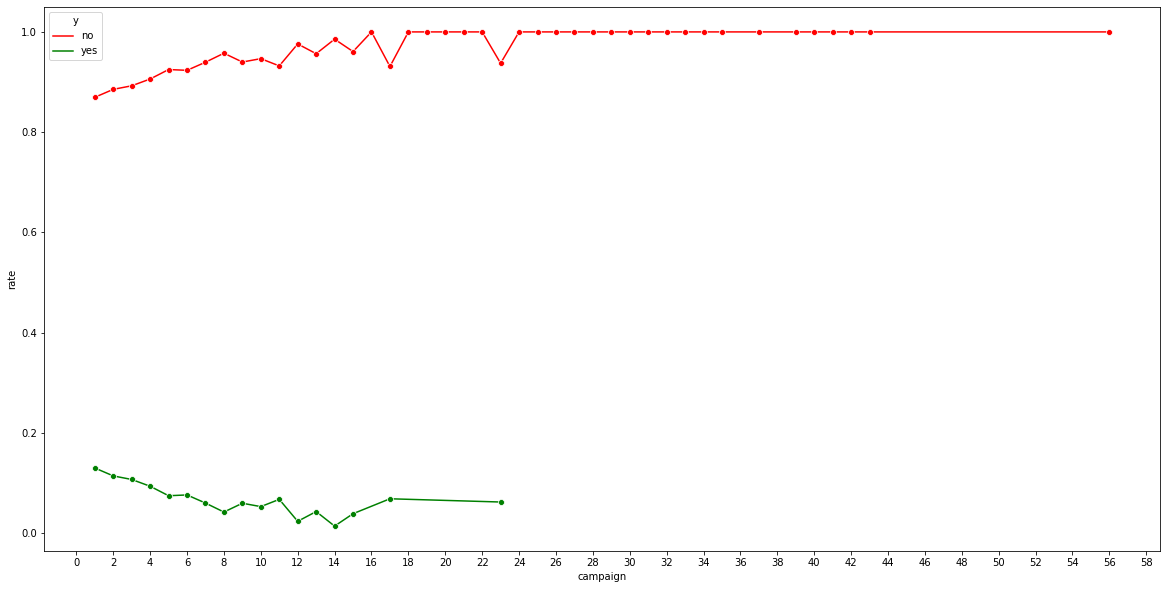

In [ ]:
# campaign 시도 횟수 1,2,3, 순서대로 성공확률이 높았음. 각각 0.130371 / 0.114570 / 0.107471 / 23번 이후로는 성공 0
campaign = pd.DataFrame(df.groupby("campaign")["y"].value_counts(normalize=True).sort_values(ascending=False))
campaign.columns = ["rate"]
campaign = campaign.reset_index()
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=campaign, x="campaign", y="rate", hue="y", marker="o", palette=["r","g"]);
plt.xticks(range(0, 60 ,2)); 

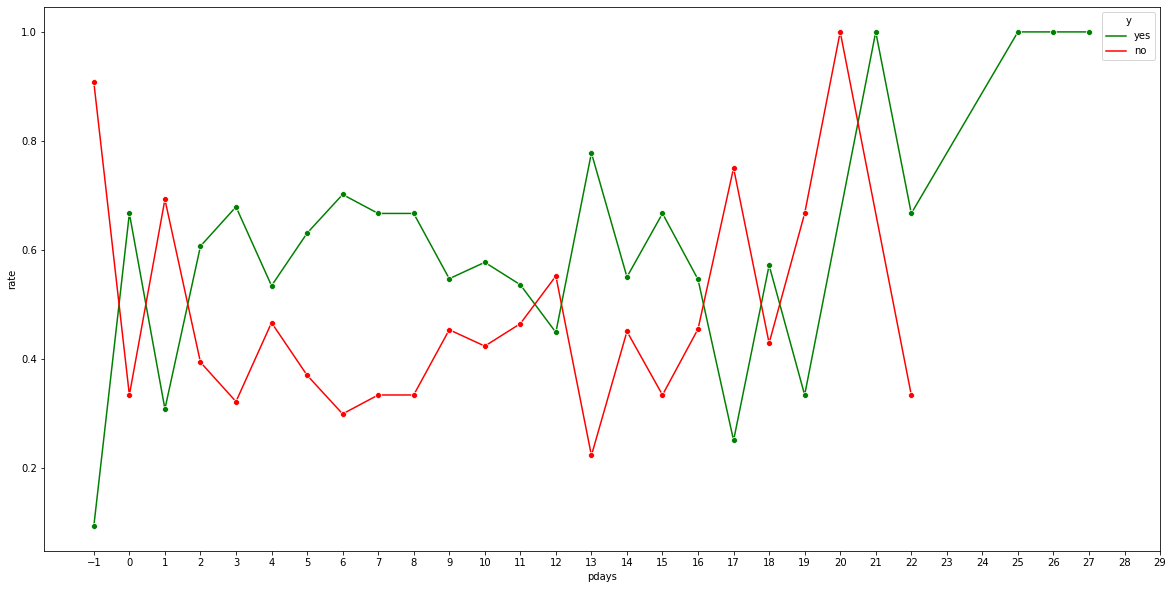

In [ ]:
pdays = pd.DataFrame(df.groupby("pdays")["y"].value_counts(normalize=True).sort_values(ascending=False))
pdays.columns = ["rate"]
pdays = pdays.reset_index()
pdays.pdays = pdays.pdays.apply(lambda x: -1 if x==999 else x)
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=pdays, x="pdays", y="rate", hue="y", marker="o", palette=["g","r"]);
plt.xticks(range(-1, 30 ,1)); 

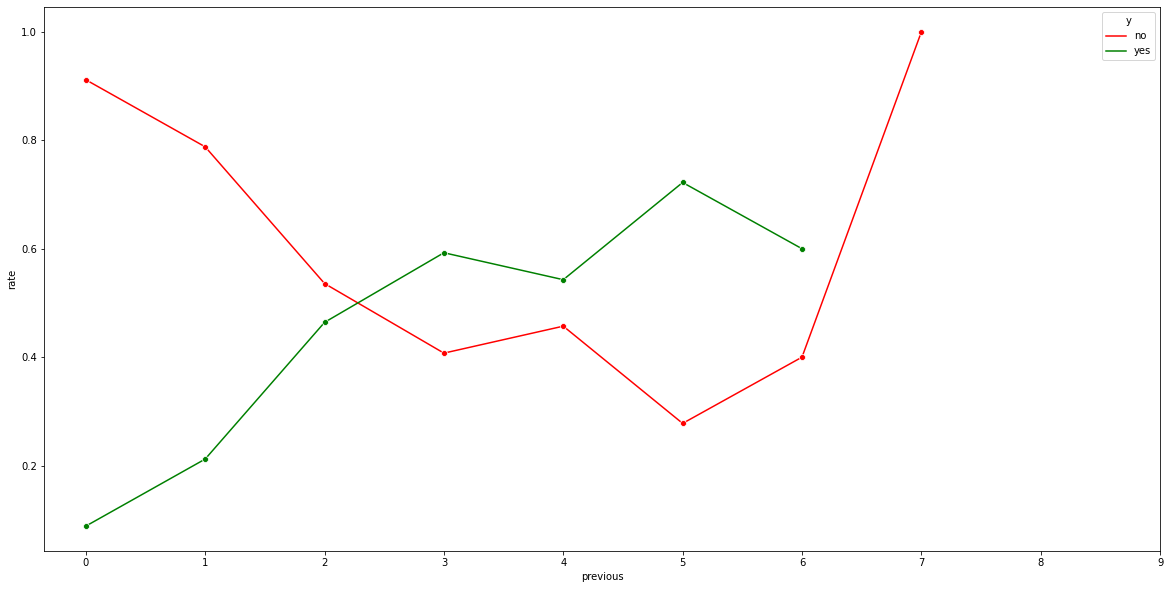

In [ ]:
previous = pd.DataFrame(df.groupby("previous")["y"].value_counts(normalize=True).sort_values(ascending=False))
previous.columns = ["rate"]
previous = previous.reset_index()
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=previous, x="previous", y="rate", hue="y", marker="o", palette=["r","g"]);
plt.xticks(range(0, 10 ,1)); 

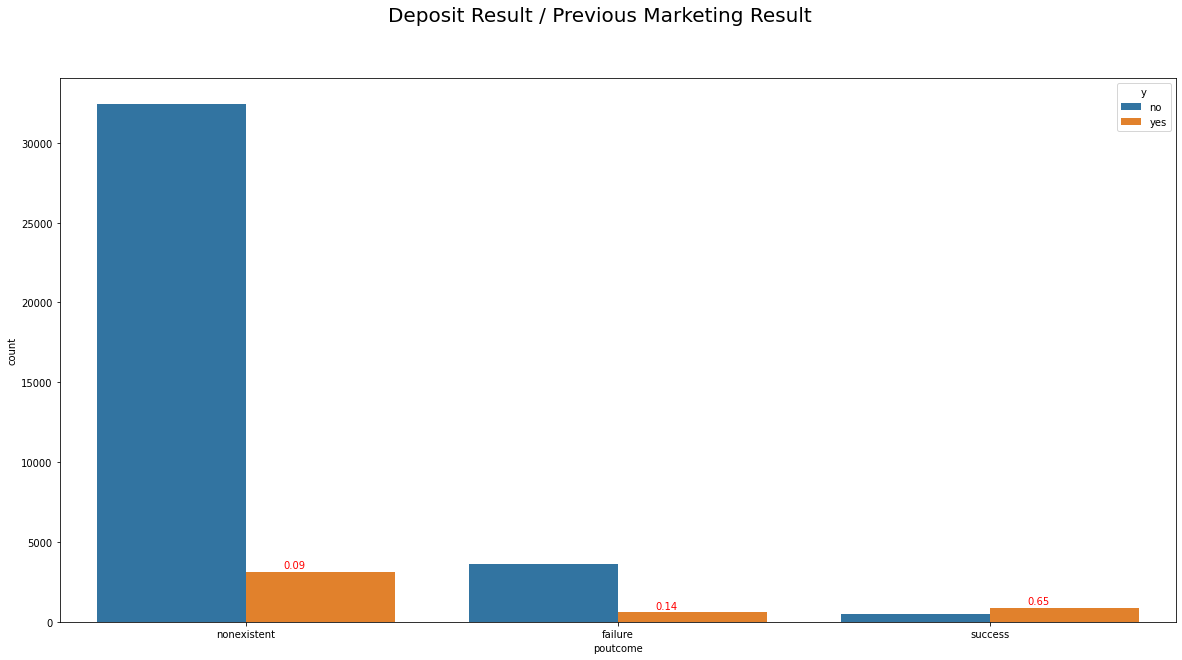

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.countplot(x="poutcome", data=df, hue="y", ax=ax)
plt.suptitle("Deposit Result / Previous Marketing Result", fontsize=20)

for idx, p in enumerate(ax.patches):
  half = int(len(ax.patches)/2)
  if(idx >= half):
    continue
  total = ax.patches[idx+half].get_height() + p.get_height()
  txt = str((ax.patches[idx+half].get_height() / total).round(2))
  txt_x = ax.patches[idx+half].get_x() + ax.patches[idx+half].get_width()/4
  txt_y = ax.patches[idx+half].get_height()+200
  ax.text(txt_x,txt_y,txt, color="r")

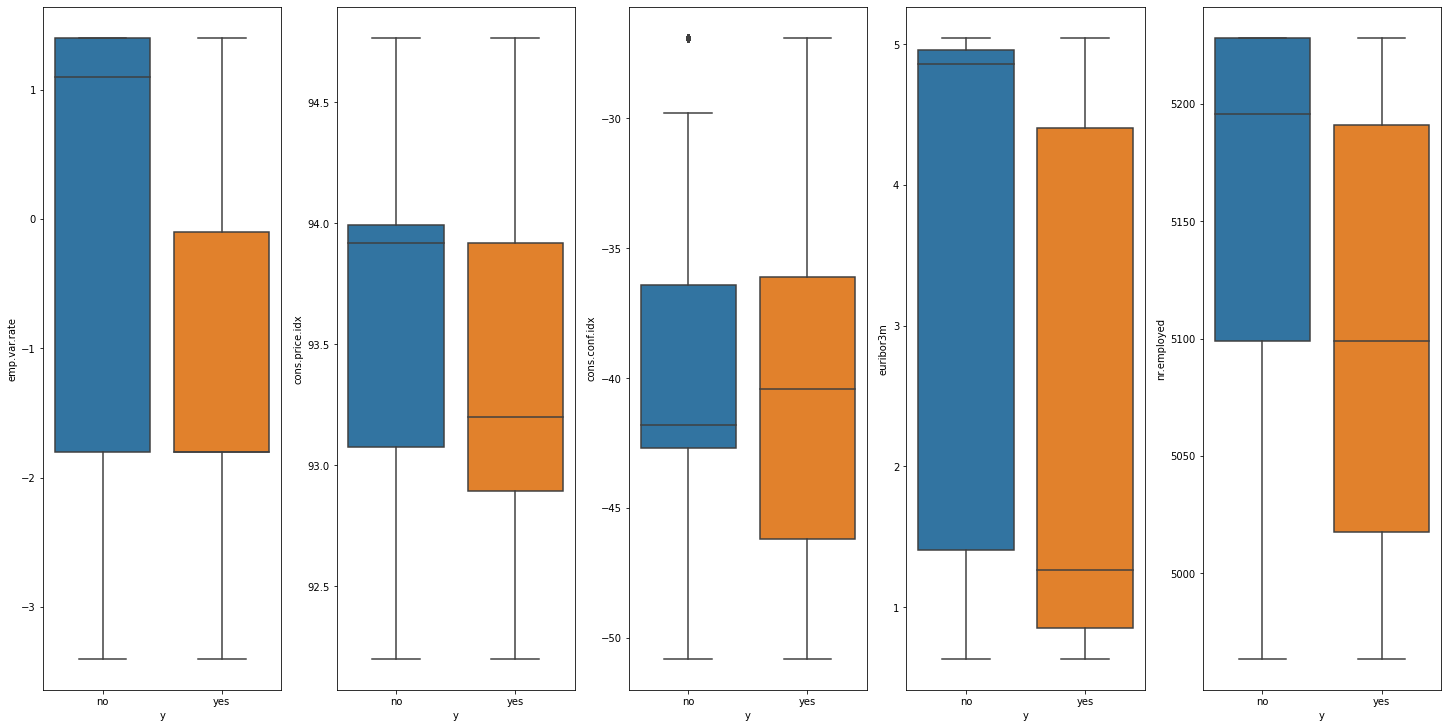

In [ ]:
# 사회지수가 타겟에 얼마나 다른 영향을 줄까 -> 타겟에 따라서 경제지수 분포의 큰 차이가 없어보인다.
fig, ax = plt.subplots(1,5, figsize=(20,10), constrained_layout=True)
sns.boxplot(data = df, x="y", y="emp.var.rate", orient="v", ax=ax[0])
sns.boxplot(data = df, x="y", y="cons.price.idx", orient="v", ax=ax[1])
sns.boxplot(data = df, x="y", y="cons.conf.idx", orient="v", ax=ax[2])
sns.boxplot(data = df, x="y", y="euribor3m", orient="v", ax=ax[3])
sns.boxplot(data = df, x="y", y="nr.employed", orient="v", ax=ax[4])
plt.show()


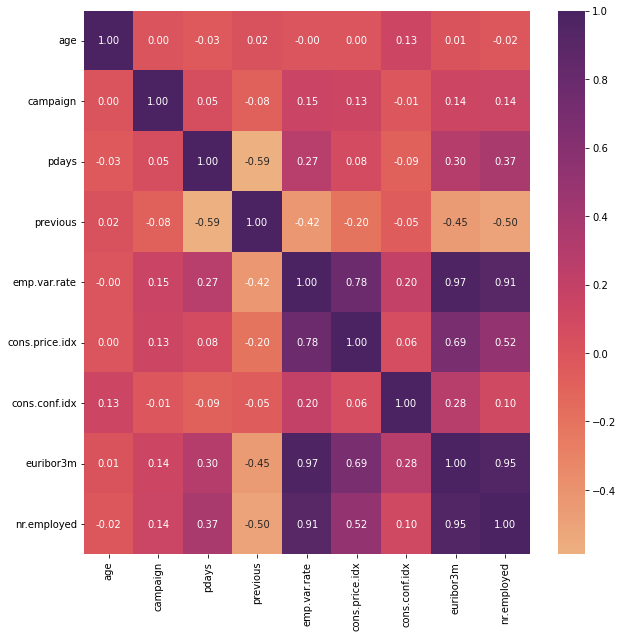

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="flare", annot=True, fmt=".2f");

# **PreProcessing**

In [ ]:
df.y.value_counts(normalize=True) # imbalanced

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [ ]:
import numpy as np

df = df.replace("unknown", np.NaN)

In [ ]:
# missing value check
for col in df.columns:
  msg = f"{col:<20} missing values = {(df[col].isna().sum() / df.shape[0]).round(4)}"
  print(msg)

age                  missing values = 0.0
job                  missing values = 0.008
marital              missing values = 0.0019
education            missing values = 0.042
default              missing values = 0.2087
housing              missing values = 0.024
loan                 missing values = 0.024
contact              missing values = 0.0
month                missing values = 0.0
day_of_week          missing values = 0.0
campaign             missing values = 0.0
pdays                missing values = 0.0
previous             missing values = 0.0
poutcome             missing values = 0.0
emp.var.rate         missing values = 0.0
cons.price.idx       missing values = 0.0
cons.conf.idx        missing values = 0.0
euribor3m            missing values = 0.0
nr.employed          missing values = 0.0
y                    missing values = 0.0


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.y = df.y.apply(lambda x: 0 if x == "no" else 1)

# **modeling with RF**

In [ ]:
#pip install category_encoders

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

In [ ]:
target = "y"
train, test = train_test_split(df, train_size=0.8, stratify=df[target], random_state=2)

X_train = train.drop(target, axis=1)
y_train = train[target]
X_test = test.drop(target, axis=1)
y_test = test[target]

In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(class_weight="balanced", random_state=2)
)

pipe.fit(X_train, y_train)
f1_score(y_test, pipe.predict(X_test))

0.3544857768052516

In [ ]:
# model selection ensemble : bagging, RF
from scipy.stats import randint, uniform

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(class_weight="balanced")
)

dists = {
    "ordinalencoder__handle_unknown" : ["return_nan", "value"],
    "simpleimputer__strategy" : ["mean", "most_frequent","median"],
    "randomforestclassifier__max_depth" : randint(5, 100),
    "randomforestclassifier__max_features" : uniform(0,1),
    "randomforestclassifier__n_estimators" : range(100, 1000),
    "randomforestclassifier__min_samples_leaf" : randint(4, 20),
    "randomforestclassifier__min_samples_split" : randint(10,40)
}

clf = RandomizedSearchCV(
    estimator = pipe,
    param_distributions = dists,
    n_iter=70,
    scoring = "f1",
    n_jobs=-1,
    cv = 3,
    verbose=1,
    random_state=2,
)

clf.fit(X_train, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 37.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('simpleimputer',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,


In [ ]:
best_rf_model = clf.best_estimator_

In [ ]:
print(f"parameters : {clf.best_params_}\n score : {clf.best_score_}")

parameters : {'ordinalencoder__handle_unknown': 'return_nan', 'randomforestclassifier__max_depth': 85, 'randomforestclassifier__max_features': 0.7256300756766004, 'randomforestclassifier__min_samples_leaf': 9, 'randomforestclassifier__min_samples_split': 16, 'randomforestclassifier__n_estimators': 669, 'simpleimputer__strategy': 'median'}
 score : 0.49647650186268494


In [ ]:
f1_score(y_test, best_rf_model.predict(X_test)) # 0.36 -> 0.5 bagging RF randomized cv best model score

0.5168747110494682

Text(0.5, 1.0, 'confusion matrix')

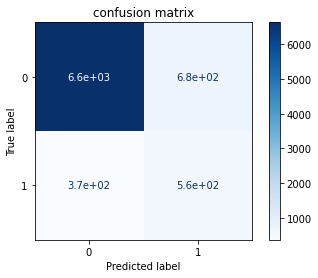

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(best_rf_model, X_test, y_test, ax=ax, cmap = plt.cm.Blues);
plt.title("confusion matrix")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7310
           1       0.45      0.60      0.52       928

    accuracy                           0.87      8238
   macro avg       0.70      0.75      0.72      8238
weighted avg       0.89      0.87      0.88      8238



In [ ]:
# optimization with valid set
from sklearn.metrics import roc_curve

train_sp, valid_sp = train_test_split(train, train_size=0.8, stratify=train[target])

X_valid_sp = valid_sp.drop(target, axis=1)
y_valid_sp = valid_sp[target]

fpr, tpr, thresholds = roc_curve(y_valid_sp, best_rf_model.predict_proba(X_valid_sp)[:,1])

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

y_pred_optimal = best_rf_model.predict_proba(X_test)[:,1] >= optimal_threshold
print(classification_report(y_test, y_pred_optimal))

0.3420102781583602
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7310
           1       0.35      0.66      0.45       928

    accuracy                           0.82      8238
   macro avg       0.65      0.75      0.67      8238
weighted avg       0.88      0.82      0.84      8238



In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, best_rf_model.predict(X_test))

0.7549473147318271

# **modeling with boosting**

In [ ]:
# boosting gradient randomsearch cv model selection
from xgboost import XGBClassifier

X_train_en = SimpleImputer(strategy="median").fit_transform(OrdinalEncoder(handle_missing="return_nan").fit_transform(X_train))
X_test_en = SimpleImputer(strategy="median").fit_transform(OrdinalEncoder(handle_missing="return_nan").fit_transform(X_test))

vc = y_train.value_counts().tolist()
ratio = float(vc[0]/vc[1])

model =  XGBClassifier(scale_pos_weight= ratio)

# model selection ensemble : bagging, RF
dists = {
    "xgbclassifier__max_depth" : randint(5, 100),
    "xgbclassifier__learning_rate" : uniform(0,0.5),
    "xgbclassifier__n_estimators" : range(100, 1000),
    "xgbclassifier__objective" : ["binary:logistic","binary:logitraw","reg:logistic"]
}

boost = RandomizedSearchCV(
    estimator = model,
    param_distributions = dists,
    n_iter = 70,
    scoring = "f1",
    n_jobs = -1,
    cv = 3,
    verbose = 1,
    random_state=2,
)

boost.fit(X_train_en, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  3.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1,
                                           sc...
                   param_distributions={'xgbclassifier__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f856

In [ ]:
boost.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=7.876616379310345,
              seed=None, silent=None, subsample=1, verbosity=1,
              xgbclassifier__learning_rate=0.21799745107100188,
              xgbclassifier__max_depth=77, xgbclassifier__n_estimators=634,
              xgbclassifier__objective='reg:logistic')>

In [ ]:
print(classification_report(y_test, boost.predict(X_test_en)))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.37      0.64      0.47       928

    accuracy                           0.84      8238
   macro avg       0.66      0.75      0.69      8238
weighted avg       0.89      0.84      0.86      8238



In [ ]:
X_validb_en = SimpleImputer(strategy="median").fit_transform(OrdinalEncoder(handle_missing="return_nan").fit_transform(X_valid_sp))

In [ ]:
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_validb, boost.predict_proba(X_validb_en)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

y_pred_optimal = boost.predict_proba(X_test_en)[:,1] >= optimal_threshold
print(classification_report(y_test, y_pred_optimal))

0.4669308
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.37      0.64      0.47       928

    accuracy                           0.84      8238
   macro avg       0.66      0.75      0.69      8238
weighted avg       0.89      0.84      0.86      8238



In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, boost.predict(X_test_en))

0.7529948346620123

model selection 결과

boosting model

precision, recall, figure = 0.37, 0.64, 0.47

ensemble model

precision, recall, figure = 0.35, 0.66, 0.45

두 모델 중 필요한 전략에 따라서 사용할 수 있다.

부유한 전략 : recall 값이 큰 ensemble model (threshold 더 작음 0.3--)

가성비 전략 : f1 값이 큰 boosting model (threshold 더 큼 0.4--)



# **Agnostic**

In [ ]:
train_sp.shape, valid_sp.shape, test.shape

((26360, 20), (6590, 20), (8238, 20))

In [ ]:
X_valid_sp.shape

(6590, 19)

In [ ]:
pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

## **permutation importances**

In [ ]:
# purmutation importances RF

permuter = PermutationImportance(
    best_rf_model.named_steps.randomforestclassifier,
    scoring="f1",
    n_iter=5,
    random_state=2
)

X_val_transformed = SimpleImputer(strategy="median").fit_transform(OrdinalEncoder(handle_missing="return_nan").fit_transform(X_valid_sp))

permuter.fit(X_val_transformed, y_valid_sp)

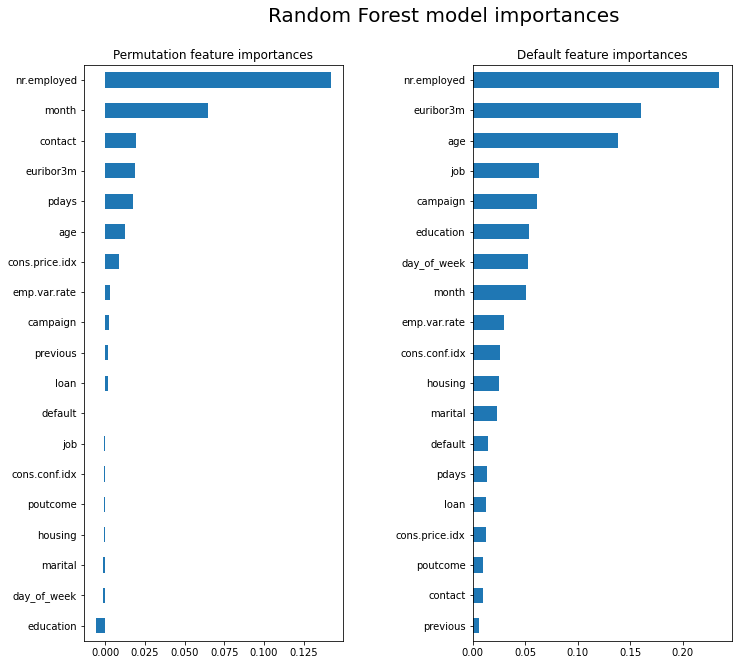

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.35)
plt.suptitle("Random Forest model importances", fontsize=20)

pd.Series(permuter.feature_importances_, X_valid_sp.columns.tolist()).sort_values(ascending=True).plot.barh(ax=ax[0]);
pd.Series(best_rf_model.named_steps.randomforestclassifier.feature_importances_, X_train.columns).sort_values().plot.barh(ax=ax[1]);

ax[0].set_title("Permutation feature importances")
ax[1].set_title("Default feature importances")
plt.show()

In [ ]:
# purmutation importances RF

permuter = PermutationImportance(
    boost,
    scoring="f1",
    n_iter=5,
    random_state=2
)

X_val_transformed = SimpleImputer(strategy="median").fit_transform(OrdinalEncoder(handle_missing="return_nan").fit_transform(X_valid_sp))

permuter.fit(X_val_transformed, y_valid_sp)

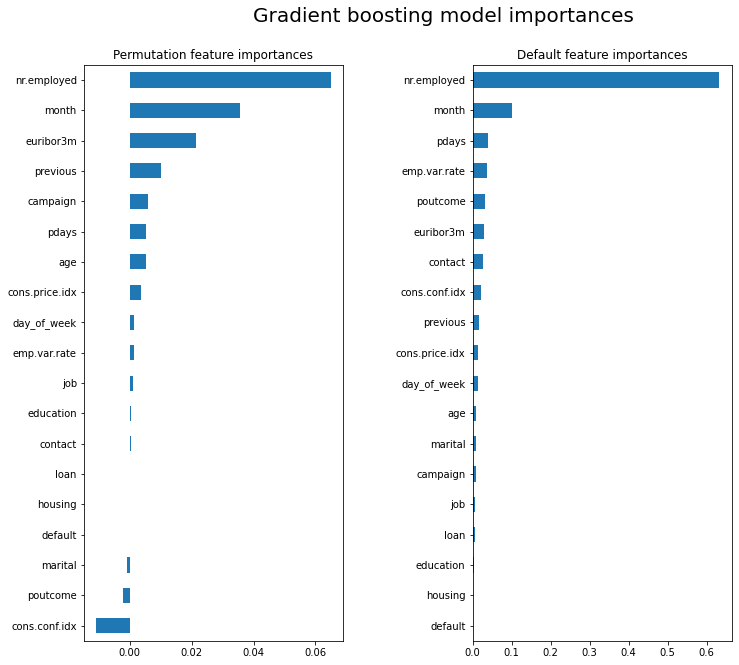

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.subplots_adjust(left=0, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.35)
plt.suptitle("Gradient boosting model importances", fontsize=20)

pd.Series(permuter.feature_importances_, X_valid_sp.columns.tolist()).sort_values(ascending=True).plot.barh(ax=ax[0]);
pd.Series(boost.feature_importances_, X_train.columns).sort_values().plot.barh(ax=ax[1]);

ax[0].set_title("Permutation feature importances")
ax[1].set_title("Default feature importances")

plt.show()